## DAY1 
####  สร้างข้อมูลใน database 15 secs สำหรับสร้างการคำนวณสะสมทุกๆ 15 วินาที


In [2]:
import pandas as pd
import MySQLdb
import time
import sys
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt

from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

In [3]:
d = 1  #run each day
j = 0

time_a = pd.date_range('2016-10-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-10-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

(timea,timeb)= ('2016-09-03 00:00:00','2016-09-03 23:59:59')

conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query_empty = """truncate table check_event.day1""" 
c.execute(query_empty)
print "check_event.day1 are Empty!!! \n"

query0 = "SELECT Timestamp,watt FROM data_timeline.refrigurator WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df0 = pd.read_sql(query0,conn)

query1 = "SELECT Timestamp,watt FROM data_timeline.wireless_router WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df1 = pd.read_sql(query1,conn)

query2 = "SELECT Timestamp,watt FROM data_timeline.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df2 = pd.read_sql(query2,conn)

query3 = "SELECT Timestamp,watt FROM data_timeline.Computer WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df3 = pd.read_sql(query3,conn)

query4 = "SELECT Timestamp,watt FROM data_timeline.elec_thermos WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df4 = pd.read_sql(query4,conn)

query5 = "SELECT Timestamp,watt FROM data_timeline.hair_dryer WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df5 = pd.read_sql(query5,conn)

query6 = "SELECT Timestamp,watt FROM data_timeline.Microwave WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df6 = pd.read_sql(query6,conn)

query7 = "SELECT Timestamp,watt FROM data_timeline.iphonecharger WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df7 = pd.read_sql(query7,conn)

query8 = "SELECT Timestamp,watt FROM data_timeline.fan WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df8 = pd.read_sql(query8,conn)

query9 = "SELECT Timestamp,watt FROM data_timeline.TV WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df9 = pd.read_sql(query9,conn)

query10 = "SELECT Timestamp,watt FROM data_timeline.washing_meachine WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df10 = pd.read_sql(query10,conn)

query11 = "SELECT Timestamp,watt FROM data_timeline.IRON WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df11 = pd.read_sql(query11,conn)

query12 = "SELECT Timestamp,watt FROM data_timeline.rice_cooker WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df12 = pd.read_sql(query12,conn)

query13 = "SELECT Timestamp,watt FROM data_timeline.water_heater WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df13 = pd.read_sql(query13,conn)

query14 = "SELECT Timestamp,watt FROM data_timeline.light_system WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df14 = pd.read_sql(query14,conn)

query16 = "SELECT Timestamp,watt FROM device.load_MONTH WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (timea,timeb)
df16 = pd.read_sql(query16,conn)


df0['watt'] = df0['watt'].astype(float)
df1['watt'] = df1['watt'].astype(float)
df2['watt'] = df2['watt'].astype(float)
df3['watt'] = df3['watt'].astype(float)
df4['watt'] = df4['watt'].astype(float)
df5['watt'] = df5['watt'].astype(float)
df6['watt'] = df6['watt'].astype(float)
df7['watt'] = df7['watt'].astype(float)
df8['watt'] = df8['watt'].astype(float)
df9['watt'] = df9['watt'].astype(float)
df10['watt'] = df10['watt'].astype(float)
df11['watt'] = df11['watt'].astype(float)
df12['watt'] = df12['watt'].astype(float)
df13['watt'] = df13['watt'].astype(float)
df14['watt'] = df14['watt'].astype(float)
df16['watt'] = df16['watt'].astype(float)

j = 0
cumulawatt = 0
contcumulawatt = 0
i20cumulawatt = 0
i14cumulawatt = 0
i8cumulawatt = 0

while (j<= len(df0)-1): 
    
    contsum15sec = (float((df16.watt[j]))/240)
    contcumulawatt += contsum15sec
    
    i20sum15sec = (float((df16.watt[j]))/240)*0.79688399449
    i20cumulawatt += i20sum15sec
    
    i14sum15sec = (float((df16.watt[j]))/240)*0.856312631368
    i14cumulawatt += i14sum15sec 
    
    i8sum15sec = (float((df16.watt[j]))/240)*0.9157412682449
    i8cumulawatt += i8sum15sec
    
    sum15sec = float((df0.watt[j]+df1.watt[j]+df2.watt[j]+df3.watt[j]+df4.watt[j]+df5.watt[j]+df6.watt[j]+df7.watt[j]+df8.watt[j]+df9.watt[j]+df10.watt[j]+df11.watt[j]+df12.watt[j]+df13.watt[j]+df14.watt[j])/240) 
    cumulawatt += sum15sec
    
    c.execute("INSERT INTO check_event.day1 (Timestamp,refrigerator,wireless,aircont,computer,electhermo,hairdryer,microwave,iphonecharger,fan,tv,washingmechine,iron,ricecooker,waterheater,lightsystem,sum15secs,cumulawatt,contsum15sec,contcumulawatt,20sum15sec,20cumulawatt,14sum15sec,14cumulawatt,8sum15sec,8cumulawatt) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
              (time_b[j],df0.watt[j],df1.watt[j],df2.watt[j],df3.watt[j],df4.watt[j],df5.watt[j],df6.watt[j],df7.watt[j],df8.watt[j],df9.watt[j],df10.watt[j],df11.watt[j],df12.watt[j],df13.watt[j],df14.watt[j],sum15sec,cumulawatt,contsum15sec,contcumulawatt,i20sum15sec,i20cumulawatt,i14sum15sec,i14cumulawatt,i8sum15sec,i8cumulawatt))
    conn.commit()
    j+=1
    
    
print "\nDONE !!!!!!"


check_event.day1 are Empty!!! 


DONE !!!!!!


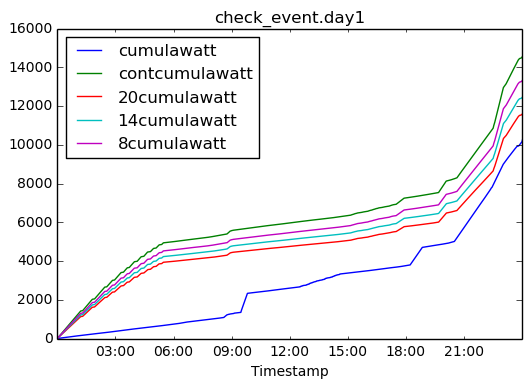

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  

query15 = "SELECT  Timestamp,cumulawatt,contcumulawatt,20cumulawatt,14cumulawatt,8cumulawatt FROM check_event.day1 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*d)-1])
df15 = pd.read_sql(query15, conn, index_col=['Timestamp'])       
fig, ax = plt.subplots()
ax.set_title('check_event.day1')
df15.plot(ax=ax )
plt.show()



In [5]:
print df15


                       cumulawatt  contcumulawatt  20cumulawatt  14cumulawatt  \
Timestamp                                                                       
2016-10-01 00:00:14      0.579167         4.83333       3.85161       4.13884   
2016-10-01 00:00:29      1.145830         9.67917       7.71317       8.28839   
2016-10-01 00:00:44      1.725000        14.54170      11.58800      12.45220   
2016-10-01 00:00:59      2.291670        19.37500      15.43960      16.59110   
2016-10-01 00:01:14      2.858330        24.25000      19.32440      20.76560   
2016-10-01 00:01:29      3.437500        29.10830      23.19600      24.92580   
2016-10-01 00:01:44      4.004170        33.95420      27.05750      29.07540   
2016-10-01 00:01:59      4.570830        38.82920      30.94230      33.24990   
2016-10-01 00:02:14      5.137500        43.69170      34.81720      37.41370   
2016-10-01 00:02:29      5.716670        48.55000      38.68870      41.57400   
2016-10-01 00:02:44      6.2